# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [103]:
#Your code here
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.power import TTestIndPower


import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [55]:
condition_M = "Master's degree"
condition_B = "Bachelor's degree"
to_pick = "AdjustedCompensation"
MS = df.loc[df["FormalEducation"] == condition_M][to_pick]
BS = df.loc[df["FormalEducation"] == condition_B][to_pick]
MS.dropna(inplace = True)
BS.dropna(inplace = True)
sns.distplot(MS)
sns.distplot(BS);

Some Information about the samples including `mean`, `median`, `standard deviation` and `sample size`:

In [58]:
# print(f"Comparision of AdjustmentCompensation for {condition_M} and {condition_B}")
# print("\n")
print("AdjustmentCompensation for {condition_M}")
print(f"Median:               {round(MS.median(),2)}")
print(f"Mean:                 {round(MS.mean(),2)}")
print(f"Standard Deviation:   {round(MS.std(),2)}")
print(f"Sample Size:          {len(MS)}")

print("\n")
print(f"AdjustmentCompensation for {condition_B}")
print(f"Median:               {round(BS.median(),2)}")
print(f"Mean:                 {round(BS.mean(),2)}")
print(f"Standard Deviation:   {round(BS.std(),2)}")
print(f"Sample Size:          {len(BS)}")

AdjustmentCompensation for {condition_M}
Median:               53812.17
Mean:                 69139.9
Standard Deviation:   135527.21
Sample Size:          1990


AdjustmentCompensation for Bachelor's degree
Median:               38399.4
Mean:                 64887.1
Standard Deviation:   306935.87
Sample Size:          1107


In [74]:
results = stats.ttest_ind(MS, BS, equal_var=False)
p_value = 1/2 * results.pvalue
p_value

0.33077639451272445

In [75]:
#Investigate Percentiles
for q in np.linspace(.8, 1, num=21):
    MSq =  round(MS.quantile(q=q), 2)
    BSq =  round(BS.quantile(q=q), 2)
    print(f'{round(q,2)}th percentile:\tset1: {MSq}\tset2: {BSq}')

0.8th percentile:	set1: 103000.0	set2: 93233.13
0.81th percentile:	set1: 107009.0	set2: 95572.83
0.82th percentile:	set1: 110000.0	set2: 99276.38
0.83th percentile:	set1: 111503.83	set2: 100000.0
0.84th percentile:	set1: 115240.4	set2: 103040.0
0.85th percentile:	set1: 119582.6	set2: 105935.04
0.86th percentile:	set1: 120000.0	set2: 110000.0
0.87th percentile:	set1: 124719.88	set2: 112000.0
0.88th percentile:	set1: 129421.46	set2: 115000.0
0.89th percentile:	set1: 130000.0	set2: 120000.0
0.9th percentile:	set1: 135000.0	set2: 120346.5
0.91th percentile:	set1: 140000.0	set2: 126460.0
0.92th percentile:	set1: 149640.0	set2: 132615.4
0.93th percentile:	set1: 150000.0	set2: 140000.0
0.94th percentile:	set1: 160000.0	set2: 143408.8
0.95th percentile:	set1: 166778.6	set2: 150000.0
0.96th percentile:	set1: 180000.0	set2: 179849.74
0.97th percentile:	set1: 200000.0	set2: 195000.0
0.98th percentile:	set1: 211100.0	set2: 200000.0
0.99th percentile:	set1: 250000.0	set2: 250000.0
1.0th percentile:

In [76]:
outlier_threshold = 5e5

condition_M = "Master's degree"
condition_B = "Bachelor's degree"
to_pick = "AdjustedCompensation"
modified_MS = df.loc[(df["FormalEducation"] == condition_M) & 
           (df["AdjustedCompensation"] <= outlier_threshold)][to_pick]
modified_BS = df.loc[(df["FormalEducation"] == condition_B) & 
           (df["AdjustedCompensation"] <= outlier_threshold)][to_pick]
modified_MS.dropna(inplace = True)
modified_BS.dropna(inplace = True)


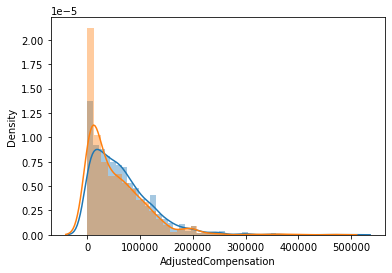

In [77]:
sns.distplot(modified_MS)
sns.distplot(modified_BS);

In [78]:
print(f"AdjustmentCompensation for {condition_M} after setting out Outlier Threshold")
print(f"Median:               {round(modified_MS.median(),2)}")
print(f"Mean:                 {round(modified_MS.mean(),2)}")
print(f"Standard Deviation:   {round(modified_MS.std(),2)}")
print(f"Sample Size:          {len(modified_MS)}")

print("\n")
print(f"AdjustmentCompensation for {condition_B} after setting out Outlier Threshold")
print(f"Median:               {round(modified_BS.median(),2)}")
print(f"Mean:                 {round(modified_BS.mean(),2)}")
print(f"Standard Deviation:   {round(modified_BS.std(),2)}")
print(f"Sample Size:          {len(modified_BS)}")

AdjustmentCompensation for Master's degree after setting out Outlier Threshold
Median:               53539.72
Mean:                 63976.63
Standard Deviation:   55340.99
Sample Size:          1985


AdjustmentCompensation for Bachelor's degree after setting out Outlier Threshold
Median:               38292.15
Mean:                 53744.35
Standard Deviation:   55285.48
Sample Size:          1103


In [79]:
results = stats.ttest_ind(modified_MS, modified_BS, equal_var=False)
results
# p_value = 1/2 * results.pvalue
# p_value

Ttest_indResult(statistic=4.926460514781741, pvalue=8.974916653864261e-07)

In [80]:
#Your code here
import flatiron_stats as fs

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

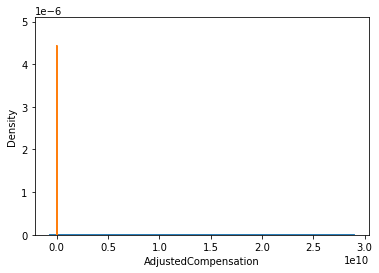

In [86]:
condition_D = "Doctoral degree"
condition_B = "Bachelor's degree"
to_pick = "AdjustedCompensation"
D = df.loc[df["FormalEducation"] == condition_D][to_pick]
BS = df.loc[df["FormalEducation"] == condition_B][to_pick]
D.dropna(inplace = True)
BS.dropna(inplace = True)
sns.distplot(D)
sns.distplot(BS);

In [87]:
# print(f"Comparision of AdjustmentCompensation for {condition_M} and {condition_B}")
# print("\n")
print("AdjustmentCompensation for {condition_D}")
print(f"Median:               {round(D.median(),2)}")
print(f"Mean:                 {round(D.mean(),2)}")
print(f"Standard Deviation:   {round(D.std(),2)}")
print(f"Sample Size:          {len(D)}")

print("\n")
print(f"AdjustmentCompensation for {condition_B}")
print(f"Median:               {round(BS.median(),2)}")
print(f"Mean:                 {round(BS.mean(),2)}")
print(f"Standard Deviation:   {round(BS.std(),2)}")
print(f"Sample Size:          {len(BS)}")

AdjustmentCompensation for {condition_D}
Median:               74131.92
Mean:                 29566175.76
Standard Deviation:   909998082.33
Sample Size:          967


AdjustmentCompensation for Bachelor's degree
Median:               38399.4
Mean:                 64887.1
Standard Deviation:   306935.87
Sample Size:          1107


In [88]:
results = stats.ttest_ind(D, BS, equal_var=False)
p_value = 1/2 * results.pvalue
p_value

0.15682381994720257

In [89]:
#Investigate Percentiles
for q in np.linspace(.8, 1, num=21):
    Dq =  round(D.quantile(q=q), 2)
    BSq =  round(BS.quantile(q=q), 2)
    print(f'{round(q,2)}th percentile:\tset1: {Dq}\tset2: {BSq}')

0.8th percentile:	set1: 135000.0	set2: 93233.13
0.81th percentile:	set1: 140000.0	set2: 95572.83
0.82th percentile:	set1: 140000.0	set2: 99276.38
0.83th percentile:	set1: 146796.17	set2: 100000.0
0.84th percentile:	set1: 150000.0	set2: 103040.0
0.85th percentile:	set1: 150000.0	set2: 105935.04
0.86th percentile:	set1: 155000.0	set2: 110000.0
0.87th percentile:	set1: 160000.0	set2: 112000.0
0.88th percentile:	set1: 160000.0	set2: 115000.0
0.89th percentile:	set1: 166480.0	set2: 120000.0
0.9th percentile:	set1: 172057.78	set2: 120346.5
0.91th percentile:	set1: 175000.0	set2: 126460.0
0.92th percentile:	set1: 181555.2	set2: 132615.4
0.93th percentile:	set1: 191900.0	set2: 140000.0
0.94th percentile:	set1: 200000.0	set2: 143408.8
0.95th percentile:	set1: 200000.0	set2: 150000.0
0.96th percentile:	set1: 220999.61	set2: 179849.74
0.97th percentile:	set1: 240879.14	set2: 195000.0
0.98th percentile:	set1: 277349.78	set2: 200000.0
0.99th percentile:	set1: 336800.0	set2: 250000.0
1.0th percentil

In [90]:
outlier_threshold = 5e5

condition_D = "Doctoral degree"
condition_B = "Bachelor's degree"
to_pick = "AdjustedCompensation"
modified_D = df.loc[(df["FormalEducation"] == condition_D) & 
           (df["AdjustedCompensation"] <= outlier_threshold)][to_pick]
modified_BS = df.loc[(df["FormalEducation"] == condition_B) & 
           (df["AdjustedCompensation"] <= outlier_threshold)][to_pick]
modified_D.dropna(inplace = True)
modified_BS.dropna(inplace = True)


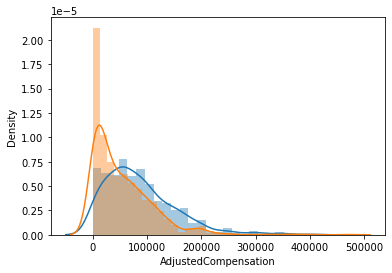

In [91]:
sns.distplot(modified_D)
sns.distplot(modified_BS);

In [92]:
print(f"AdjustmentCompensation for {condition_D} after setting out Outlier Threshold")
print(f"Median:               {round(modified_D.median(),2)}")
print(f"Mean:                 {round(modified_D.mean(),2)}")
print(f"Standard Deviation:   {round(modified_D.std(),2)}")
print(f"Sample Size:          {len(modified_D)}")

print("\n")
print(f"AdjustmentCompensation for {condition_B} after setting out Outlier Threshold")
print(f"Median:               {round(modified_BS.median(),2)}")
print(f"Mean:                 {round(modified_BS.mean(),2)}")
print(f"Standard Deviation:   {round(modified_BS.std(),2)}")
print(f"Sample Size:          {len(modified_BS)}")

AdjustmentCompensation for Doctoral degree after setting out Outlier Threshold
Median:               73152.77
Mean:                 86194.98
Standard Deviation:   65298.89
Sample Size:          964


AdjustmentCompensation for Bachelor's degree after setting out Outlier Threshold
Median:               38292.15
Mean:                 53744.35
Standard Deviation:   55285.48
Sample Size:          1103


In [93]:
results = stats.ttest_ind(modified_D, modified_BS, equal_var=False)
results
# p_value = 1/2 * results.pvalue
# p_value

Ttest_indResult(statistic=12.098472655425814, pvalue=1.6387413004630542e-32)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [108]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols


F = "FormalEducation"
A = "AdjustedCompensation"
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [109]:
F = "FormalEducation"
A = "AdjustedCompensation"
temp = df[df["AdjustedCompensation"]<=5*10**5]
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!